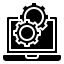
# Arquivo de Pré-processamento

***Autor: Diego Cunha***

Script de pré-processamento dos arquivos de despesas e receitas das prestações de contas das eleições de 2018 e 2020 e também do arquivos com as informções dos candidato eleitos.
O script abaixo acessa os arquivos disponiveis no google drive no diretório:
*   /content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_{ano}/
*   /content/drive/MyDrive/MATF35/dados/consulta_cand_{ano}/

Padrão dos arquivos:

*   despesas_contratadas_candidatos_{ano}_{UF}.csv
*   receitas_candidatos_{ano}_{UF}.csv
*   consulta_cand_{ano}_{UF}.csv

Após o pré-processamento os arquivos são unificados em um único arquivo de despesas e receitas referente ao ano da eleição como também é realizado um merge com a informação se o candidato foi eleito ou não, que é salvo no diretório /content/drive/MyDrive/MATF35/dados/arquivos_processados.
 
Sendo gerados os arquivos despesas_2018.csv, despesas_2020.csv, receitas_2018.csv e receitas_2020.csv que serão utilizados para as análises dos dados referentes ao trabalho.

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_{}/'
path_processados = '/content/drive/MyDrive/MATF35/dados/arquivos_processados/{}_{}.csv'
arquivo_despesa = 'despesas_contratadas_candidatos_{}_{}.csv'
arquivo_receita = 'receitas_candidatos_{}_{}.csv'

path_candidatos = '/content/drive/MyDrive/MATF35/dados/consulta_cand_{}/'
arquivo_candidato = 'consulta_cand_{}_{}.csv'


cols_despesas_drop = ['DT_GERACAO','HH_GERACAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','DS_ELEICAO','TP_PRESTACAO_CONTAS','ST_TURNO','DT_ELEICAO','CD_ELEICAO',
                      'DT_PRESTACAO_CONTAS','NM_FORNECEDOR','NR_CNPJ_PRESTADOR_CONTA','NR_CPF_CANDIDATO','NR_CPF_VICE_CANDIDATO',
                      'DS_TIPO_FORNECEDOR','NR_CPF_CNPJ_FORNECEDOR','NM_FORNECEDOR_RFB','CD_ESFERA_PART_FORNECEDOR','DS_ESFERA_PART_FORNECEDOR',
                      'SG_UF_FORNECEDOR','CD_MUNICIPIO_FORNECEDOR','NM_MUNICIPIO_FORNECEDOR','SQ_CANDIDATO_FORNECEDOR','NR_CANDIDATO_FORNECEDOR',
                      'CD_CARGO_FORNECEDOR','DS_CARGO_FORNECEDOR','NR_PARTIDO_FORNECEDOR','SG_PARTIDO_FORNECEDOR','NM_PARTIDO_FORNECEDOR',
                      'DS_TIPO_DOCUMENTO','NR_DOCUMENTO','SQ_DESPESA','DS_DESPESA']
cols_receitas_drop = ['DT_GERACAO','HH_GERACAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','DS_ELEICAO','TP_PRESTACAO_CONTAS','ST_TURNO','DT_ELEICAO','CD_ELEICAO',
                      'DT_PRESTACAO_CONTAS','NR_CNPJ_PRESTADOR_CONTA','NR_CPF_CANDIDATO','NR_CPF_VICE_CANDIDATO','CD_NATUREZA_RECEITA','DS_NATUREZA_RECEITA',
                      'CD_ESPECIE_RECEITA','DS_ESPECIE_RECEITA','CD_CNAE_DOADOR','DS_CNAE_DOADOR','NR_CPF_CNPJ_DOADOR','NM_DOADOR','NM_DOADOR_RFB',
                      'CD_ESFERA_PARTIDARIA_DOADOR','DS_ESFERA_PARTIDARIA_DOADOR','SG_UF_DOADOR','CD_MUNICIPIO_DOADOR','NM_MUNICIPIO_DOADOR',
                      'SQ_CANDIDATO_DOADOR','NR_CANDIDATO_DOADOR','CD_CARGO_CANDIDATO_DOADOR','DS_CARGO_CANDIDATO_DOADOR','NR_PARTIDO_DOADOR',
                      'SG_PARTIDO_DOADOR','NM_PARTIDO_DOADOR','NR_RECIBO_DOACAO','NR_DOCUMENTO_DOACAO','SQ_RECEITA','DS_RECEITA']

cols_candidatos_drop = ['DT_GERACAO', 'HH_GERACAO','ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','TP_ABRANGENCIA',
                        'CD_CARGO','DS_CARGO','NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO','NR_CPF_CANDIDATO','NM_EMAIL','CD_SITUACAO_CANDIDATURA',
                        'DS_SITUACAO_CANDIDATURA','CD_DETALHE_SITUACAO_CAND','DS_DETALHE_SITUACAO_CAND','TP_AGREMIACAO','SQ_COLIGACAO','NM_COLIGACAO',
                        'DS_COMPOSICAO_COLIGACAO','CD_NACIONALIDADE','DS_NACIONALIDADE','SG_UF_NASCIMENTO','CD_MUNICIPIO_NASCIMENTO','NM_MUNICIPIO_NASCIMENTO',
                        'DT_NASCIMENTO','NR_IDADE_DATA_POSSE','NR_TITULO_ELEITORAL_CANDIDATO','CD_GENERO','DS_GENERO','CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO',
                        'CD_ESTADO_CIVIL','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA','CD_OCUPACAO','DS_OCUPACAO','VR_DESPESA_MAX_CAMPANHA','ST_REELEICAO',
                        'ST_DECLARAR_BENS','NR_PROTOCOLO_CANDIDATURA','NR_PROCESSO','CD_SITUACAO_CANDIDATO_PLEITO','DS_SITUACAO_CANDIDATO_PLEITO',
                        'CD_SITUACAO_CANDIDATO_URNA','DS_SITUACAO_CANDIDATO_URNA','ST_CANDIDATO_INSERIDO_URNA','NR_TURNO','SG_UF','SG_UE','NM_UE',
                        'NR_CANDIDATO','NM_CANDIDATO','NR_PARTIDO','SG_PARTIDO','NM_PARTIDO']

estados_nordeste = ['AL','BA','CE','MA','PB','PE','PI','SE','RN']

def ajuste_data_frame_candidatos(path_file):
  df = pd.read_csv(path_file, sep=';', encoding= 'unicode_escape')

  # REMOVENDO COLUNAS NÃO UTILIZADAS
  df = df.drop(columns=cols_candidatos_drop)

  # CONVERTENDO CD_SIT_TOT_TURNO PARA ELEITO OU NÃO ELEITO
  df['ELEITO'] = df['CD_SIT_TOT_TURNO'].map(lambda x: 1 if x in [1,2,3] else 0)

  return df

def unir_data_frames(data_frames):
  data_frame_final = pd.concat(data_frames)
  
  return data_frame_final

def ajuste_data_frame(path_file,tipo):
  df = pd.read_csv(path_file, sep=';', encoding= 'unicode_escape')

  if tipo.upper()=='D':
    # REMOVENDO COLUNAS NÃO UTILIZADAS
    df = df.drop(columns=cols_despesas_drop)

    # CONVERTENDO O VALOR DA DESPESA PARA FLOAT
    df['VR_DESPESA_CONTRATADA'] = df['VR_DESPESA_CONTRATADA'].str.replace(',','.').astype(float)

    # CONVERTENDO CD_TIPO_FORNECEDOR PARA PF OU PJ
    df['CD_TIPO_FORNECEDOR'] = df['CD_TIPO_FORNECEDOR'].map({0: 'PF', 1: 'PJ'})

    # PEGANDO O MES DA DESPESA
    df['NR_MES'] = df['DT_DESPESA'].str[3:5].astype(int)
  elif tipo.upper()=='R':
    # REMOVENDO COLUNAS NÃO UTILIZADAS
    df = df.drop(columns=cols_receitas_drop)

    # CONVERTENDO O VALOR DA DESPESA PARA FLOAT
    df['VR_RECEITA'] = df['VR_RECEITA'].str.replace(',','.').astype(float)

  return df

def pre_processamento_candidatos(ano):
  print('============ Processando arquivo de candidatos ============')

  data_frames = []
  size_soma = 0
  for estado in estados_nordeste:
    path_file = path_candidatos.format(ano) + arquivo_candidato.format(ano,estado)

    print(path_file)
    data_frame = ajuste_data_frame_candidatos(path_file)
    size_soma = data_frame.size + size_soma
    print(data_frame.size)
    data_frames.append(data_frame)

  # juntar dataframes
  df_final = unir_data_frames(data_frames)
  return df_final

def pre_processamento(ano,tipo):
  if tipo.upper()=='D':
    file = arquivo_despesa
    print('============ Processando arquivo de despesas ============')
    tipo_prestacao = 'despesas'
  elif tipo.upper()=='R':
    file = arquivo_receita
    print('============ Processando arquivo de receitas ============')
    tipo_prestacao = 'receitas'

  data_frames = []
  size_soma = 0
  for estado in estados_nordeste:
    path_file = path.format(ano) + file.format(ano,estado)

    print(path_file)
    data_frame = ajuste_data_frame(path_file,tipo)
    size_soma = data_frame.size + size_soma
    print(data_frame.size)
    data_frames.append(data_frame)

  # juntar dataframes
  df_final = unir_data_frames(data_frames)

  candidatos = pre_processamento_candidatos(ano)
  df_merge = pd.merge(df_final, candidatos.filter(['SQ_CANDIDATO','ELEITO']),on=['SQ_CANDIDATO'])

  # df_final.to_csv(path_processados.format(tipo_prestacao,ano), index=False)
  df_merge.to_csv(path_processados.format(tipo_prestacao,ano), index=False)

  return df_merge

despesas_2018 = pre_processamento(2018,'D')
despesas_2020 = pre_processamento(2020,'D')

receitas_2018 = pre_processamento(2018,'R')
receitas_2020 = pre_processamento(2020,'R')

============ Processando arquivo de despesas ============
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_AL.csv
342762
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_BA.csv
1133580
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_CE.csv
1071672
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_MA.csv
516495
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_PB.csv
479556
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_PE.csv
1174992
/content/drive/MyDrive/MATF35/dados/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_PI.csv
425565
/

In [ ]:
despesas_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282007 entries, 0 to 282006
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_ELEICAO            282007 non-null  int64  
 1   SQ_PRESTADOR_CONTAS    282007 non-null  int64  
 2   SG_UF                  282007 non-null  object 
 3   SG_UE                  282007 non-null  object 
 4   NM_UE                  282007 non-null  object 
 5   CD_CARGO               282007 non-null  int64  
 6   DS_CARGO               282007 non-null  object 
 7   SQ_CANDIDATO           282007 non-null  int64  
 8   NR_CANDIDATO           282007 non-null  int64  
 9   NM_CANDIDATO           282007 non-null  object 
 10  NR_PARTIDO             282007 non-null  int64  
 11  SG_PARTIDO             282007 non-null  object 
 12  NM_PARTIDO             282007 non-null  object 
 13  CD_TIPO_FORNECEDOR     282007 non-null  object 
 14  CD_CNAE_FORNECEDOR     282007 non-nu

In [ ]:
receitas_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60326 entries, 0 to 60325
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ANO_ELEICAO          60326 non-null  int64  
 1   SQ_PRESTADOR_CONTAS  60326 non-null  int64  
 2   SG_UF                60326 non-null  object 
 3   SG_UE                60326 non-null  object 
 4   NM_UE                60326 non-null  object 
 5   CD_CARGO             60326 non-null  int64  
 6   DS_CARGO             60326 non-null  object 
 7   SQ_CANDIDATO         60326 non-null  int64  
 8   NR_CANDIDATO         60326 non-null  int64  
 9   NM_CANDIDATO         60326 non-null  object 
 10  NR_PARTIDO           60326 non-null  int64  
 11  SG_PARTIDO           60326 non-null  object 
 12  NM_PARTIDO           60326 non-null  object 
 13  CD_FONTE_RECEITA     60326 non-null  int64  
 14  DS_FONTE_RECEITA     60326 non-null  object 
 15  CD_ORIGEM_RECEITA    60326 non-null 